The dot product is a basic numerical method used to measure the similarity between two vectors (lists of numbers, or in our case, time series). It is simply obtained by multiplying corresponding elements of the time series and then adding up the resulting products, resulting in one number. In the case of time series, this number is large when the time series are similar, and small when they are dissimilar- a lot like correlation, or covariance. In fact,the dot product is very similar to the population covariance, for those who remember this from their stats training. 

Here are a few examples, where we call one time series the "kernel", the other the "data", a terminology we will keep for the remainder of our examples and live scripts. 


In [2]:
# For this example we will use the following libraries:
# - numpy: for numerical operations
# - matplotlib: for plotting
# - scipy: for signal processing

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig

# Next, we'll set matplotlib to plot inline, i.e. plot the figures in the notebook itself.
%matplotlib inline

First, a simple sine wave kernel: 

(126,)

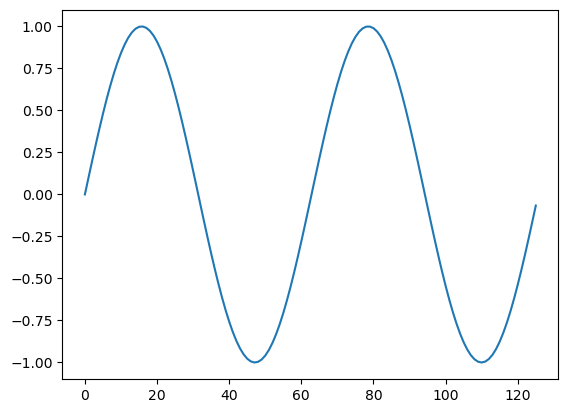

In [18]:
kernel=np.sin(np.arange(0,np.pi*4,0.1))
plt.plot(kernel)

Now, some example data, let's start with noisy version of the sine wave

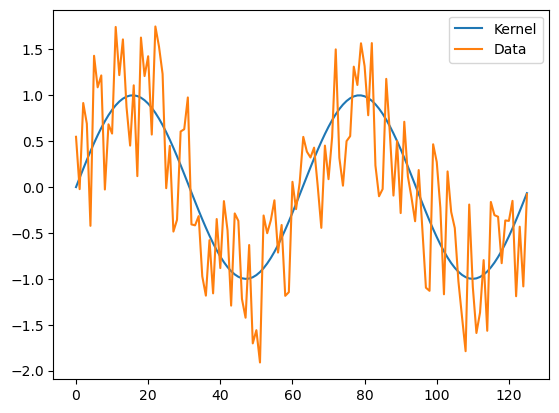

In [21]:
seed = 42 # set seed for reproducibility
temp = np.random.default_rng(seed=seed).uniform(0,1,1000)-0.5
data1 =  np.sin(np.arange(0,np.pi*4,0.1))+np.random.default_rng(seed=seed).uniform(-1,1,len(kernel))
plt.plot(kernel)
plt.plot(data1)
plt.legend(['Kernel', 'Data'])

We could calculate the dot product by doing the pointwise product and then summing across the products: 

In [36]:
notthemostelegantway = np.zeros(len(kernel))

for i in range(len(kernel)):
    notthemostelegantway[i] = data1[i] * kernel[i]

dotproduct4doubters = np.sum(notthemostelegantway)


array(61.59743829)

We could calculate it more elegantly, using a bit of simple matrix algebra, because people who do math are prepared for recurring problems: 


In [38]:
dotproduct1 = np.dot(kernel, data1)
print('dotproduct4doubters :', dotproduct4doubters, '\ndotproduct1 :', dotproduct1)

assert np.allclose(dotproduct4doubters,dotproduct1), 'Print this if dot products are not the same'

dotproduct4doubters : 61.597438289649894 
dotproduct1 : 61.597438289649894


Now, an example where there is less correspondence between the kernel and the data. 
  
We simply use a cosine function to generate our noisy data


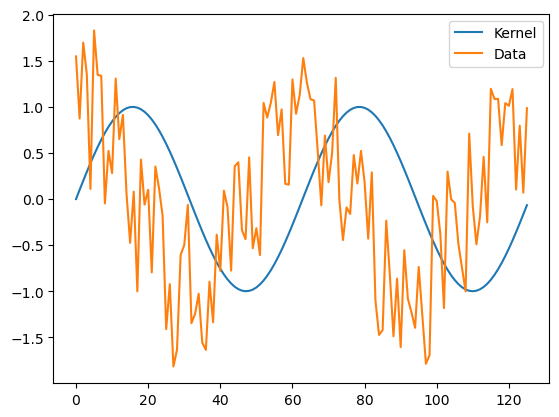

In [41]:
plt.figure() 
#kernel2=np.cos(np.arange(0,np.pi*4,0.1))
plt.plot(kernel)
data2 =  np.cos(np.arange(0,np.pi*4,0.1))+np.random.default_rng(seed=seed).uniform(-1,1,len(kernel))
plt.plot(data2)
plt.legend(['Kernel', 'Data'])

dotproduct2 = np.dot(kernel,data2.T)

And finally, the dot product is sensitive to the scale. Let's make the kernel double its size and try this again: 

dotproduct2a : 123.19487657929979 
 dotproduct2b : -2.491410082787016


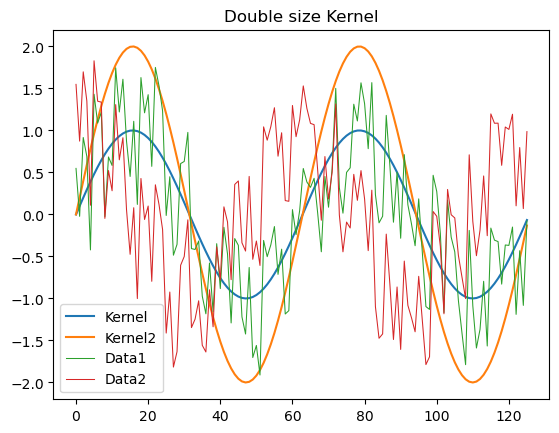

In [46]:
kernel2 = np.sin(np.arange(0,np.pi*4,0.1)) * 2.0

plt.figure() 
plt.plot(kernel,label='Kernel')
plt.plot(kernel2,label='Kernel2')
data2 =  np.cos(np.arange(0,np.pi*4,0.1))+np.random.default_rng(seed=seed).uniform(-1,1,len(kernel))
plt.plot(data1, label='Data1',lw=0.75)
plt.plot(data2, label='Data2',lw=0.75)
plt.legend()
plt.title('Double size Kernel')

dotproduct2a = np.dot(kernel2,data1.T)
dotproduct2b = np.dot(kernel2,data2.T)

print('dotproduct2a :', dotproduct2a, '\n dotproduct2b :', dotproduct2b)

# dotproduct2 = np.dot(kernel,data2.T)

# kernel2 =  2*sin(0:0.1:pi*4); 
# figure, plot(kernel2), hold on
# plot(data1),
# plot(data2), legend('Double size Kernel', 'Data1', 'Data2')
# dotproduct2a = kernel2*data1'
# dotproduct2b = kernel2*data2'

you guessed it! when the kernel is twice as big, the dot product between the kernel and the data becomes twice as big

In [54]:
print('dotproduct1 :',dotproduct1,'; dotproduct1 X 2:',dotproduct1*2,'\n dotproduct2a :',dotproduct2a)
print('dotproduct2 :',dotproduct2,'; dotproduct2 X 2:',dotproduct2*2,'\n dotproduct2b :',dotproduct2b)

dotproduct1 : 61.597438289649894 ; dotproduct1 X 2: 123.19487657929979 
 dotproduct2a : 123.19487657929979
dotproduct2 : -1.245705041393508 ; dotproduct2 X 2: -2.491410082787016 
 dotproduct2b : -2.491410082787016


## Matrix multiplication implementation of the inner product

Matrices M1 and M2 are multiplied by multiplying the row elements of M1 with the column elements of M2, and the results added for each row/column pair. 

The sign for this is *
In Matlab, * is matrix multiplication and .* is elementwise individual multiplication without any addition. 
In this process, the inner dimensions get lost: 
The product of 2 M1 and M2 exists only if the number of columns of M1 (the second dimension) is equal to the number of rows of M2 (its first dimension).


In [59]:
a = np.random.random((3,2))
print(a.shape)

b = np.random.random((2,3))
print(b.shape)


(3, 2)
(2, 3)


The results has dimensions of rows of M1 and columns of M2 (again, the "inner" dimensions are lost, - but not the data of course)

In [65]:
c = np.dot(a, b)
print(c.shape)

(3, 3)


more examples with random number matrices. 
what will the new dimensions be? 

In [68]:
print(np.dot(np.random.random((4,3)), np.random.random((3,1))).shape)

print(np.dot(np.random.random((2,1)), np.random.random((1,10))).shape)

print(np.dot(np.random.random((2,1)), np.random.random((1,1))).shape)

(4, 1)
(2, 10)
(2, 1)



https://timeseriesreasoning.com/contents/deep-dive-into-variance-covariance-matrices/

**Inner product**: 

- matrix multiplication of two vectors of the same length, one is a row, one is a column vector

In [ ]:
a1 = np.random.random((1,4))
a2 = np.random.random((4,1))

one more time, two vectors...

<BarContainer object of 4 artists>

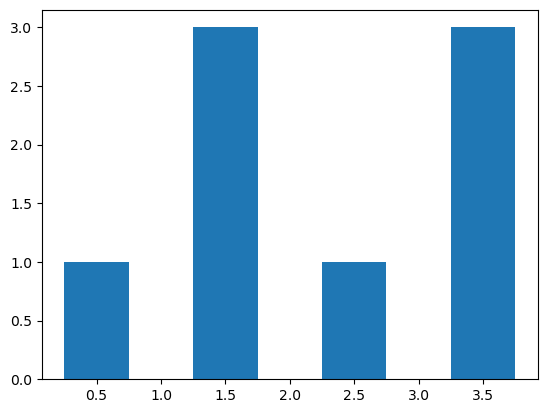

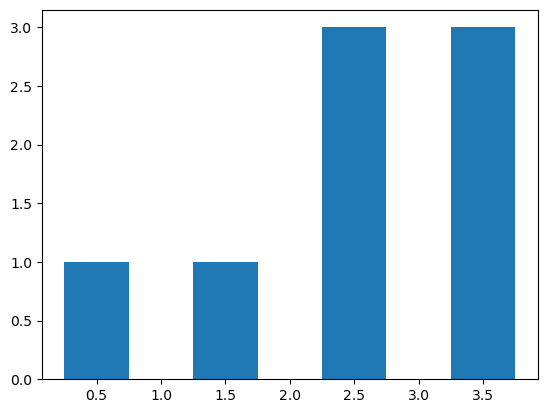

In [76]:
x = 0.5 + np.arange(4)

a1 = np.array([-1, 1, -1, 1]) + 2
plt.figure()
plt.bar(x,a1, width=0.5)

a2 = np.array([-1, -1, 1, 1]) + 2
plt.figure()
plt.bar(x,a2, width=0.5)

The inner product between those two vectors

In [73]:
c = np.dot(a1,a2)
c

16

So, the inner product is a measure of similarity between two vectors. 
- It is high when they are similar, and low when they are not. 
- In fact, the inner product is like an unscaled correlation coefficient. 

Let's try this.
One more time, two vectors...

<BarContainer object of 4 artists>

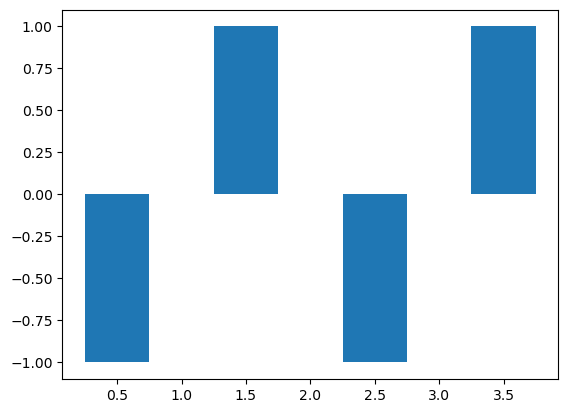

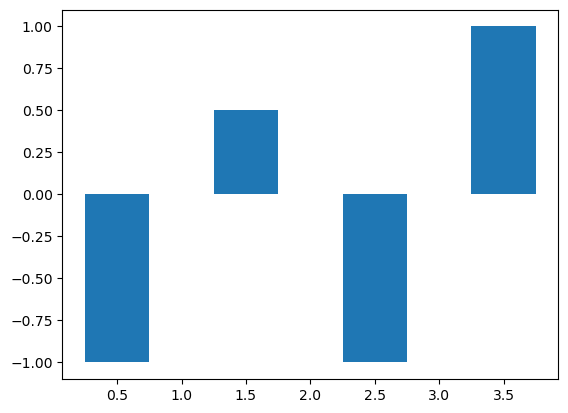

In [77]:
x = 0.5 + np.arange(4)

a3 = np.array([-1, 1, -1, 1])
plt.figure()
plt.bar(x,a3, width=0.5)

a4 = np.array([-1, .5, -1, 1])
plt.figure()
plt.bar(x,a4, width=0.5)


The inner product between those two vectors

In [81]:
c3_4 = np.dot(a3,a4)

print(c,c3_4)

16 3.5


In [ ]:

# The dot product is a basic numerical method used to measure the similarity between two vectors (lists of numbers, or in our case, time series). It is simply obtained by multiplying corresponding elements of the time series and then adding up the resulting products, resulting in one number. In the case of time series, this number is large when the time series are similar, and small when they are dissimilar- a lot like correlation, or covariance. In fact,the dot product is very similar to the population covariance, for those who remember this from their stats training. 
# Here are a few examples, where we call one time series the "kernel", the other the "data", a terminology we will keep for the remainder of our examples and live scripts. 
# First, a simple sine wave kernel: 
# clear
# kernel =  sin(0:0.1:pi*4); 
# figure, plot(kernel), hold on

# Now, some example data, let's start with noisy version of the sine wave
# rng(080769)
# data1 =  sin(0:0.1:pi*4)+rand(1,size(kernel,2)); 
# plot(data1), legend('Kernel', 'Data')

# We could calculate the dot product by doing the pointwise product and then summing across the products: 
# for x = 1:size(kernel,2)
# notthemostelegantway(x) = kernel(x) * data1(x); 
# end
# dotproduct4doubters = sum(notthemostelegantway)

# We could calculate it more elegantly, using a bit of simple matrix algebra, because people who do math are prepared for recurring problems: 
# dotproduct1 = kernel*data1'
# disp(['dimensions of the kernel:  ', num2str(size(kernel))])
# disp(['dimensions of the data, flipped:  ', num2str(size(data1'))])

# Now, an example where there is less correspondence between the kernel and the data. We simply use a cosine function to generate our noisy data
# figure, plot(kernel), hold on
# data2 =  cos(0:0.1:pi*4)+rand(1,size(kernel,2)); 
# plot(data2), legend('Kernel', 'Data')
# dotproduct2 = kernel*data2'


# And finally, the dot product is sensitive to the scale. Let's make the kernel double its size and try this again: 
# kernel2 =  2*sin(0:0.1:pi*4); 
# figure, plot(kernel2), hold on
# plot(data1),
# plot(data2), legend('Double size Kernel', 'Data1', 'Data2')
# dotproduct2a = kernel2*data1'
# dotproduct2b = kernel2*data2'
# you guessed it! when the kernel is twice as big, the dot product between the kernel and the data becomes twice as big
# dotproduct1*2
# dotproduct2*2




# Matrix multiplication implementation of the inner product

# Matrices M1 and M2 are multiplied by multiplying the row elements of M1 with the column elements of M2, and the results added for each row/column pair. 
# The sign for this is *
# In Matlab, * is matrix multiplication and .* is elementwise individual multiplication without any addition. 
# In this process, the inner dimensions get lost: 
# The product of 2 M1 and M2 exists only if the number of columns of M1 (the second dimension) is equal to the number of rows of M2 (its first dimension).

# a = rand(3,2)
# size(a)
# b = rand (2,3)
# size(b)

# The results has dimensions of rows of M1 and columns of M2 (again, the "inner" dimensions are lost, - but not the data of course)
# c = a * b 
# size(c)
# more examples with random number matrices. 
# what will the new dimensions be? 
# rand(4,3) * rand(3,1)

# rand(2,1) * rand(1,10)

# rand(2,1) * rand(1,1)

# https://timeseriesreasoning.com/contents/deep-dive-into-variance-covariance-matrices/

# inner product: 
# matrix multiplication of two vectors of the same length, one is a row, one is a column vector
# a1 = rand(1,4)
# a2 = rand(4,1)

# one more time, two vectors
# a1 = [-1 1 -1 1] + 2
# figure, bar(a1)
# a2 = [-1 -1 1 1] + 2
# figure, bar(a2)

# The inner product between those two vectors
# c = a1*a2'

# so, the inner product is a measure of similarity between two vectors, it is high when they are similar, and low when they are not. In fact, the inner product is like an unscaled correlation coefficient. Let's try this
# one more time, two vectors
# a1 = [-1 1 -1 1]
# figure, bar(a1)
# a2 = [-1 .5 -1 1]
# figure, bar(a2)

# The inner product between those two vectors
# c = a1*a2'